In [70]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [71]:
PATH = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv'
experiment_data = pd.read_csv(PATH)

experiment_data.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [80]:
experiment_data['date'] = pd.DatetimeIndex(experiment_data['timestamp']).date
print(experiment_data['date'].unique())


[datetime.date(2017, 1, 21) datetime.date(2017, 1, 12)
 datetime.date(2017, 1, 11) datetime.date(2017, 1, 8)
 datetime.date(2017, 1, 10) datetime.date(2017, 1, 19)
 datetime.date(2017, 1, 17) datetime.date(2017, 1, 4)
 datetime.date(2017, 1, 15) datetime.date(2017, 1, 18)
 datetime.date(2017, 1, 9) datetime.date(2017, 1, 22)
 datetime.date(2017, 1, 24) datetime.date(2017, 1, 23)
 datetime.date(2017, 1, 20) datetime.date(2017, 1, 5)
 datetime.date(2017, 1, 6) datetime.date(2017, 1, 13)
 datetime.date(2017, 1, 7) datetime.date(2017, 1, 3)
 datetime.date(2017, 1, 2) datetime.date(2017, 1, 16)
 datetime.date(2017, 1, 14)]


In [81]:
# How large is each group?
print('test sample size:', len(experiment_data[experiment_data.group == 'treatment']))
print('control sample size:', len(experiment_data[experiment_data.group == 'control']))
print('test proportion:', len(experiment_data[experiment_data.group == 'treatment'])/(len(experiment_data[experiment_data.group == 'treatment'])+len(experiment_data[experiment_data.group == 'control'])))
print()

# What is the signup rate of test and control?
print('test signup rate:', experiment_data[experiment_data.group == 'treatment'].converted.mean())
print('control signup rate:', experiment_data[experiment_data.group == 'control'].converted.mean())

# Are the test and control groups significantly different?
stats.ttest_ind(experiment_data[experiment_data.group == 'treatment'].converted,
                experiment_data[experiment_data.group == 'control'].converted)

test sample size: 145311
control sample size: 145274
test proportion: 0.5000636646764286

test signup rate: 0.11880724790277405
control signup rate: 0.1203863045004612


Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

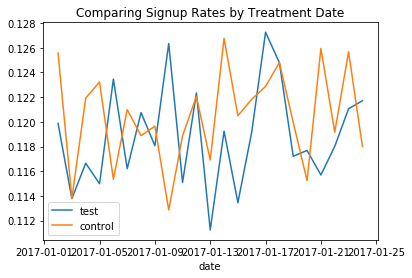

T-Test Results by Date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult

In [85]:
fig = experiment_data[experiment_data.group=='treatment'][
    ['date', 'converted']].groupby('date').mean().plot()
experiment_data[experiment_data.group=='control'][
    ['date', 'converted']].groupby('date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for date in experiment_data.date.unique():
    dated_data = experiment_data[experiment_data.date == date]
    print(stats.ttest_ind(dated_data[dated_data.group == 'treatment'].converted,
                          dated_data[dated_data.group == 'control'].converted))

The experiment shows that as time has passed and more data has accumulated over conversion rates, that the difference between old and new emails are no longer significantly different. This is not the usual case with a t-score and increase in sample size. In this case, it might be that over time the interest in the item or product being marketed has plateued and is not influenced by email anymore. The product could be marketed by other means such as exposure or word of mouth where the new and old email are equally effective (or in effective).